# Homework8 by group3

Authors:Kaiyang LIN,Tianhao MOU,Lin LIU,Yunxia SHI,Guangyi NING

### Exercise 1

Recall our inventory problem where inventory follows


\begin{equation*}
  X_{t+1} = 
  \begin{cases}
      ( S - D_{t+1})^+ & \quad \text{if } X_t \leq s \\
      ( X_t - D_{t+1} )^+ &  \quad \text{if } X_t > s
  \end{cases}
\end{equation*}

The demand sequence is IID and obeys

$$ \mathbb P \{D_t = d\} = (1 - p)^d p $$

for $d = 0, 1, \ldots$.  Here $p$ is a parameter in $(0, 1)$.

Let

$$ 
    h_s(x) = x + (S - x) \mathbb 1\{x \leq s \}
$$

denote stock on hand after the restocking decision is made.  Profits are given by

$$ 
    \pi(X_t, D_{t+1}) 
    = \min\{h_s(X_t), D_{t+1}\} - c \mathbb 1\{X_t \leq s\}
$$

Here $c$ is a fixed cost of restocking.  We are assuming that the marginal cost of stock is zero for simplicity, and that the unit price of output is 1.

Maximize long run average profits for the firm by choosing $s$ optimally.  You can do this visually, if you like, by plotting profits as a function of $s$.

In doing so, assume that $S=20$ and $p=0.5$.

Use simulation and the law of large numbers.  Try to optimize the execution speed of your implementation.

### Solution:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [3]:
S = 20
p = 0.5
sim_length = 100
x0=10
c=1

In [4]:
@jit(nopython=True, parallel=True)
def ϕ():
    return np.random.geometric(p) - 1


In [5]:
@jit(nopython=True, parallel=True)        
def G(x,d,s):
    if x <= s:
        return max(S - d, 0)
    else:
        return max(x - d, 0)

    

In [6]:
@jit(nopython=True, parallel=True) 
def inventory(s):
    X = np.empty(sim_length)
    D = np.empty(sim_length)
    X[0] = x0  
    D[0] = 0
    for t in range(sim_length-1):
        D[t+1] = ϕ()
        X[t+1] = G(X[t], D[t+1],s)
    return X,D
 

In [7]:
@jit(nopython=True, parallel=True)         
def average_profits(s,m=100):
    π_val=np.empty(m)
    for i in range(m):      
        X,D=inventory(s)
        h = X+(S-X)*(X<=s)
        π=np.empty(sim_length-1)        
        for t in range(sim_length-1):
            π[t]=min(h[t],D[t+1])-c*(X[t]<=s)
        π_val[i]=np.mean(π)
    return np.mean(π_val)
        
average_profits=np.vectorize(average_profits)   

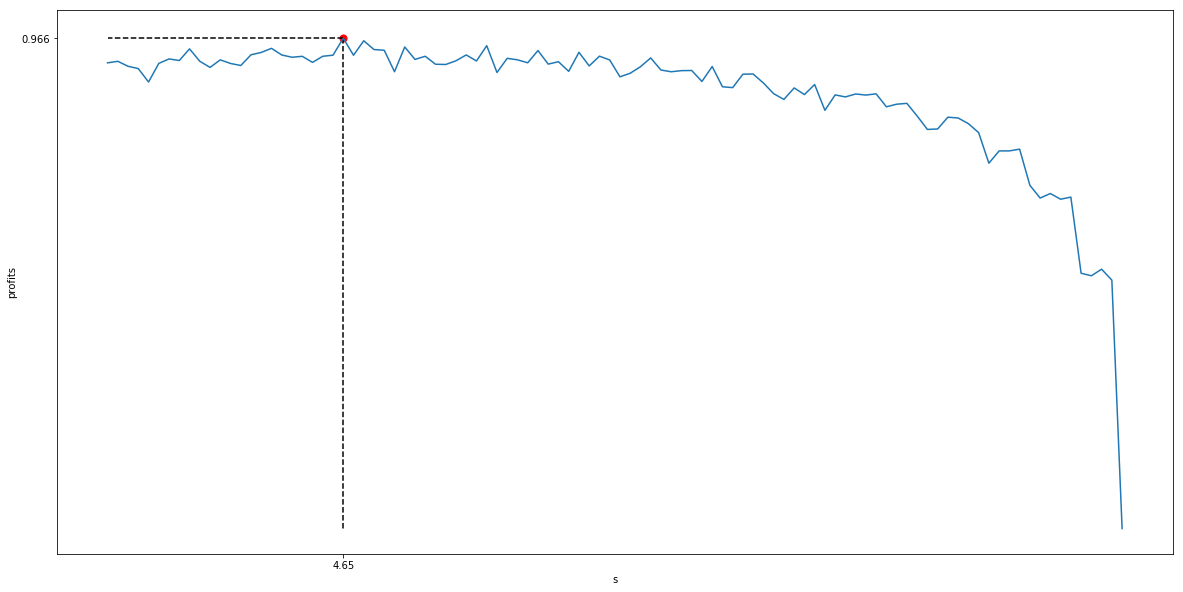

 Under the assumption x0=10 and c=1, we abtain the maximal long run average profits 0.9663636363636364 when s=4.646464646464646


In [8]:
fig,ax=plt.subplots(figsize=(20,10))
n=100
s=np.linspace(0,20,n)
profits=average_profits(s)
max_profit=np.max(profits)
s_optimize=s[np.argmax(profits)]

plt.scatter([s_optimize,], [max_profit,], s=50, color='r')
ax.set_xticks([s_optimize])
ax.set_yticks([max_profit])
ax.plot([s_optimize,s_optimize],[max_profit,0],'k--')
ax.plot([s_optimize,0],[max_profit,max_profit],'k--')
ax.plot(s,profits)
ax.set_xlabel('s')
ax.set_ylabel('profits')
plt.show()
print(' Under the assumption x0=10 and c=1, we abtain the maximal long run average profits {} when s={}'.format(max_profit,s_optimize))
